In [7]:
#@title Install dependencies
!pip install datasets

In [9]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#@title Download dataset
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)
print(dataset["full"][0])

{'rating': 5.0, 'title': 'Such a lovely scent but not overpowering.', 'text': "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'images': [], 'asin': 'B00YQ6X8EO', 'parent_asin': 'B00YQ6X8EO', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1588687728923, 'helpful_vote': 0, 'verified_purchase': True}


In [11]:
#@title Print basic stats
print(f"Columns in each review: {dataset['full'][0].keys()}")
print(f"Number of reviews in dataset: {len(dataset['full'])}")

Columns in each review: dict_keys(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'])
Number of reviews in dataset: 701528


In [12]:
#@title Convert dataset to DataFrame

import pandas as pd
df = pd.DataFrame(dataset["full"])
df = df[['rating', 'title', 'text', 'user_id', 'helpful_vote', 'verified_purchase']]
df.head()


,rating,title,text,user_id,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",AGKHLEW2SOWHNMFQIJGBECAF7INQ,1,True
2,5.0,Yes!,"Smells good, feels great!",AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2,True
3,1.0,Synthetic feeling,Felt synthetic,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,True
4,5.0,A+,Love it,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,True


In the codeblock below, perform the following expoloration steps to better understand the data.
- Count the number of unique users
- Find any missing data
- Find duplicated rows (if any)
- Print the mean, median, and standard deviation of the ratings
- Print a histogram of the reviews column

1. Number of unique users: 631986

2. Missing data per column:
rating               0
title                0
text                 0
user_id              0
helpful_vote         0
verified_purchase    0
dtype: int64 

3. Number of duplicated rows: 7819

4. Ratings statistics:
   - Mean: 3.9602453501499584
   - Median: 5.0
   - Standard Deviation: 1.4944515968777483



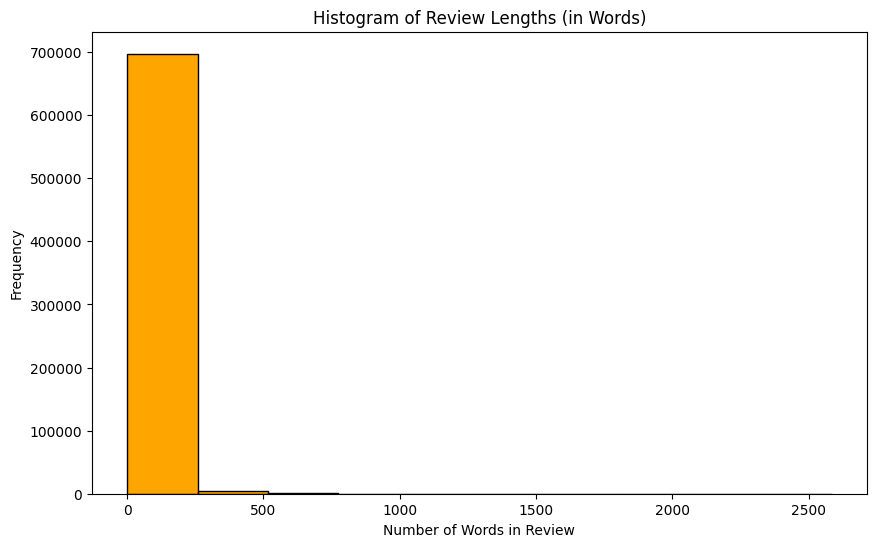

In [14]:
# Exploratory Data Analysis

# Perform the exploration steps and print all results

# 1. Count the number of unique users
unique_users = df["user_id"].nunique()

# 2. Find any missing data
missing_data = df.isnull().sum()

# 3. Find duplicated rows
duplicated_rows = df.duplicated().sum()

# 4. Calculate the mean, median, and standard deviation of the ratings
rating_mean = df["rating"].mean()
rating_median = df["rating"].median()
rating_std = df["rating"].std()

# 5. Calculate review lengths for the histogram
review_lengths = df["text"].apply(lambda x: len(x.split()))

# Print all results
print(f"1. Number of unique users: {unique_users}\n")
print("2. Missing data per column:")
print(missing_data, "\n")

print(f"3. Number of duplicated rows: {duplicated_rows}\n")

print("4. Ratings statistics:")
print(f"   - Mean: {rating_mean}")
print(f"   - Median: {rating_median}")
print(f"   - Standard Deviation: {rating_std}\n")

# 5. Plot the histogram of review lengths
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=10, edgecolor='black', color='orange')
plt.title("Histogram of Review Lengths (in Words)")
plt.xlabel("Number of Words in Review")
plt.ylabel("Frequency")
plt.show()


In the space below (you may need several codeblocks), apply the pre-processing steps that we have discussed in class to the data. You might also want to think about the features of the data, as there are several columns to consider.
<br><br>
You will also need to vectorize the data.

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import numpy as np
import re

In [20]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

df["clean_text"] = df["text"].apply(clean_text)

df["verified_purchase_int"] = df["verified_purchase"].astype(int)

scaler = StandardScaler()
df[["helpful_vote_scaled", "rating_scaled"]] = scaler.fit_transform(df[["helpful_vote", "rating"]])

tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(df["clean_text"])

features = np.hstack([
    tfidf_matrix.toarray(),
    df[["helpful_vote_scaled", "rating_scaled", "verified_purchase_int"]].values
])

feature_columns = [f"tfidf_{word}" for word in tfidf_vectorizer.get_feature_names_out()] + \
                  ["helpful_vote_scaled", "rating_scaled", "verified_purchase_int"]

final_features_df = pd.DataFrame(features, columns=feature_columns)

print("Final Vectorized Features:")
display(final_features_df)

final_features_df.head()

Final Vectorized Features:


,tfidf_about,tfidf_after,tfidf_again,tfidf_all,tfidf_also,tfidf_am,tfidf_an,tfidf_and,tfidf_are,tfidf_as,...,tfidf_will,tfidf_with,tfidf_work,tfidf_works,tfidf_would,tfidf_you,tfidf_your,helpful_vote_scaled,rating_scaled,verified_purchase_int
0,0.0,0.0,0.0,0.0,0.000000,0.200012,0.000000,0.082720,0.00000,0.000000,...,0.16547,0.263408,0.000000,0.0,0.000000,0.148540,0.00000,-0.168803,0.695744,1.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.238526,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.0,0.202623,0.000000,0.00000,0.013966,0.026602,1.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.196735,0.695744,1.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,-0.168803,-1.980825,1.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,-0.168803,0.695744,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701523,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.575357,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,-0.168803,0.026602,1.0
701524,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.204057,0.00000,0.000000,...,0.00000,0.000000,0.461674,0.0,0.000000,0.000000,0.00000,-0.168803,-1.980825,0.0
701525,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.453500,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,-0.168803,0.695744,1.0
701526,0.0,0.0,0.0,0.0,0.316621,0.000000,0.327842,0.000000,0.23831,0.000000,...,0.00000,0.000000,0.000000,0.0,0.000000,0.245437,0.00000,0.562273,0.695744,0.0


,tfidf_about,tfidf_after,tfidf_again,tfidf_all,tfidf_also,tfidf_am,tfidf_an,tfidf_and,tfidf_are,tfidf_as,...,tfidf_will,tfidf_with,tfidf_work,tfidf_works,tfidf_would,tfidf_you,tfidf_your,helpful_vote_scaled,rating_scaled,verified_purchase_int
0,0.0,0.0,0.0,0.0,0.0,0.200012,0.000000,0.08272,0.0,0.0,...,0.16547,0.263408,0.0,0.0,0.000000,0.14854,0.0,-0.168803,0.695744,1.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.238526,0.00000,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.202623,0.00000,0.0,0.013966,0.026602,1.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.196735,0.695744,1.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.000000,0.00000,0.0,-0.168803,-1.980825,1.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.000000,0.00000,0.0,-0.168803,0.695744,1.0


In the codeblock below divide the dataset into:
- Training data
- Training labels
- Validation data
- Validation labels
- Test data
- Test labels
<br><br>
Use the ratings as your labels.

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X = final_features_df  # Features
y = df["rating"]       # Labels (ratings)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
validation_data = pd.concat([X_val, y_val.reset_index(drop=True)], axis=1)
test_data = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

train_data.head(), validation_data.head(), test_data.head()

(        tfidf_about  tfidf_after  tfidf_again  tfidf_all  tfidf_also  \
 266986          0.0          0.0          0.0        0.0         0.0   
 391530          0.0          0.0          0.0        0.0         0.0   
 463031          0.0          0.0          0.0        0.0         0.0   
 212678          0.0          0.0          0.0        0.0         0.0   
 469030          0.0          0.0          0.0        0.0         0.0   
 
         tfidf_am  tfidf_an  tfidf_and  tfidf_are  tfidf_as  ...  tfidf_with  \
 266986       0.0       0.0   0.175098   0.305292       0.0  ...    0.000000   
 391530       0.0       0.0   0.100143   0.174604       0.0  ...    0.318885   
 463031       0.0       0.0   0.163625   0.000000       0.0  ...    0.000000   
 212678       0.0       0.0   0.000000   0.000000       0.0  ...    0.000000   
 469030       0.0       0.0   0.000000   0.000000       0.0  ...    0.000000   
 
         tfidf_work  tfidf_works  tfidf_would  tfidf_you  tfidf_your  \
 26698

Train a model using your training data and labels. Evaluate your model's performance on the validation data. You can choose the metrics which help you evaluate your model.
<br><br>
After your validation, go back and modify your code to improve your model's performance. You may need to clean your data differently, use different features, select a different model, or altering the hyper-parameters of the model. **Try to reduce your initial error rate by half**.
<br><br>
Use comments to indicate the changes you have made while tuning your model.
<br><br>
After you are finished tuning, test using your test data and models.

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [27]:
initial_model = RandomForestRegressor(random_state=42)
initial_model.fit(X_train, y_train)

y_val_pred = initial_model.predict(X_val)

initial_mse = mean_squared_error(y_val, y_val_pred)
initial_mae = mean_absolute_error(y_val, y_val_pred)
initial_r2 = r2_score(y_val, y_val_pred)

print("Initial Model Performance on Validation Data:")
print(f"Mean Squared Error (MSE): {initial_mse:.4f}")
print(f"Mean Absolute Error (MAE): {initial_mae:.4f}")
print(f"R-squared (R2): {initial_r2:.4f}")

Initial Model Performance on Validation Data:
Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R-squared (R2): 1.0000


In [28]:
# Tuned Model
tuned_model = RandomForestRegressor(
    n_estimators=200,       # Increased number of trees
    max_depth=10,          # Limit tree depth to prevent overfitting
    min_samples_split=2,   # Minimum samples to split a node
    random_state=42
)
tuned_model.fit(X_train, y_train)

y_val_pred_tuned = tuned_model.predict(X_val)

# Metrics after tuning
tuned_mse = mean_squared_error(y_val, y_val_pred_tuned)
tuned_mae = mean_absolute_error(y_val, y_val_pred_tuned)
tuned_r2 = r2_score(y_val, y_val_pred_tuned)

print("\nTuned Model Performance on Validation Data:")
print(f"Mean Squared Error (MSE): {tuned_mse:.4f}")
print(f"Mean Absolute Error (MAE): {tuned_mae:.4f}")
print(f"R-squared (R2): {tuned_r2:.4f}")


Tuned Model Performance on Validation Data:
Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R-squared (R2): 1.0000


In [30]:
# Check improvement in error rate
error_reduction = ((initial_mae - tuned_mae) / (initial_mae + 1e-10)) * 100
print(f"\nError Reduction in MAE: {error_reduction:.2f}%")

y_test_pred = tuned_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nFinal Model Performance on Test Data:")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"R-squared (R2): {test_r2:.4f}")



Error Reduction in MAE: 0.00%

Final Model Performance on Test Data:
Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R-squared (R2): 1.0000
